In [16]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os

In [17]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_SimpleStew/'

In [18]:
bscore=pd.read_csv('M_BDScore.csv')

In [19]:
bscore

Participant  Block Design Raw Score
0         C001                      36
1         C003                      58
2         C006                      42
3         C008                      34
4         C009                      24
5         C012                      54
6         C013                      48
7         C016                      39
8         C017                      36
9         C020                      30
10        C021                      29
11        C024                      42
12        C025                      24
13        C028                      50
14        C029                      34
15        C032                      63

In [20]:
final_df=pd.read_csv('PositionDistance_SimpleStew.csv')

In [21]:
final_df = pd.merge(bscore, final_df, on='Participant', how='inner')
final_df

Participant  Block Design Raw Score        Chest   HeadCamera  \
0         C001                      36  3412.670879  4279.274901   
1         C003                      58  3924.459833  4188.586910   
2         C006                      42  1333.791569  3044.388844   
3         C008                      34  4242.098701  5457.755161   
4         C009                      24  6417.363081  7355.626722   
5         C012                      54  1885.463295  2343.370019   
6         C013                      48  6810.143228  7843.467810   
7         C016                      39  2344.234017  2511.131882   
8         C017                      36  3142.145291  4675.839669   
9         C020                      30  3334.669489  5200.170016   
10        C021                      29  3949.856691  5474.071393   
11        C024                      42  1566.527293  2192.288003   
12        C025                      24  3827.027365  5545.765782   
13        C028                      50  2610.421895  4652.023813   
14        C029                      34  4217.017529  6230.493933   
15        C032                      63     0.000000  2465.846811   

       LeftElbow  LeftShoulder  MotionControllerLeft  MotionControllerRight  \
0    4288.582700   3973.000007           5182.224529           10905.739544   
1   10956.856699   5295.321816           6069.771100           11752.435623   
2    1984.150383   2171.609415           3695.805905           10100.423327   
3    7109.453141   6251.381485           7812.578524           15305.334757   
4    9619.928363   8002.941907          10363.980246           17018.966026   
5    3102.490358   2282.249138           3587.356143           10589.813612   
6   10009.235997   9369.871433          12558.189528           15412.361778   
7    4298.854968   3616.865710           5000.861837            8592.558163   
8    4934.165755   4271.509320           6913.017052           11519.019822   
9    4989.299953   4342.714386           6011.462516           11887.168528   
10   6274.606614   5554.345131           7579.732127           15740.776787   
11   2438.558939   2134.637817           2925.305221           10858.381962   
12   3858.423582   4377.832749           4837.947890           12868.885461   
13   1606.013566   1996.178004           1674.911886           13411.667544   
14   7091.159590   6160.227687           8607.063746           15332.816194   
15   1450.211354   1681.961759           2304.416157            9826.000865   

      RightElbow  RightShoulder  
0       0.000000       0.000000  
1    9980.064138    5986.207882  
2    6357.739703    4950.245383  
3   12542.308661    8928.642077  
4   13587.082828    9942.432144  
5    7435.435851    4836.915787  
6   12714.614154   10091.989281  
7    6352.376486    4692.583555  
8    9631.877375    6059.969241  
9    9021.289379    6577.576007  
10  12322.960956    7882.893811  
11   6920.801348    5242.307665  
12   9887.670131    6824.871671  
13   9905.399885    7094.981287  
14  11464.879407    9309.641042  
15   6850.895792    4517.944071

#### Scatter plot between block design scores and total distance (Trackers)

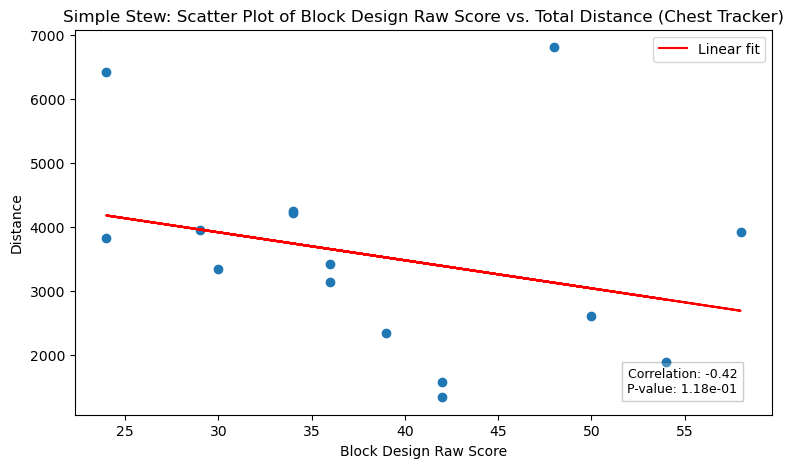

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

chest_df = final_df[final_df['Chest'] != 0]
correlation, p_value = spearmanr(chest_df['Block Design Raw Score'], chest_df['Chest'])
plt.figure(figsize=(9,5))
plt.scatter(chest_df['Block Design Raw Score'], chest_df['Chest'])

# Calculate linear fit
slope, intercept = np.polyfit(chest_df['Block Design Raw Score'], chest_df['Chest'], 1)
fit_line = slope * chest_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(chest_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Total Distance (Chest Tracker)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '1 SS_DistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

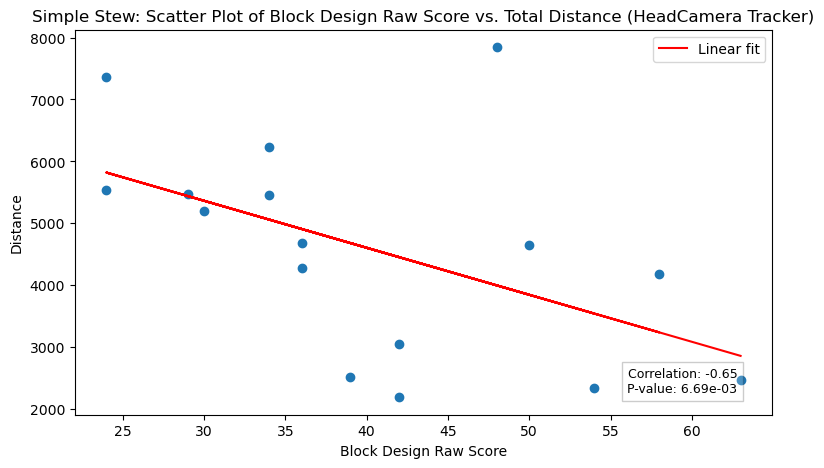

In [23]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['HeadCamera'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['HeadCamera'])

slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['HeadCamera'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Total Distance (HeadCamera Tracker)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '2 SS_DistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

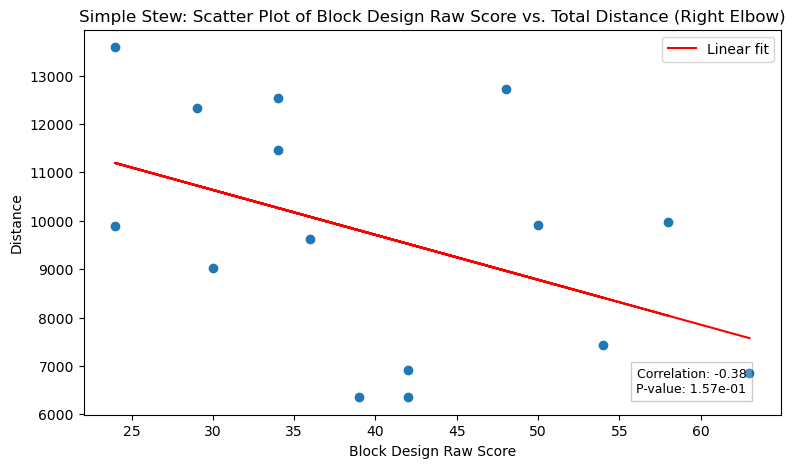

In [24]:
rightelbow_df = final_df[final_df['RightElbow'] != 0]
correlation, p_value = spearmanr(rightelbow_df['Block Design Raw Score'], rightelbow_df['RightElbow'])
plt.figure(figsize=(9,5))
plt.scatter(rightelbow_df['Block Design Raw Score'], rightelbow_df['RightElbow'])


slope, intercept = np.polyfit(rightelbow_df['Block Design Raw Score'], rightelbow_df['RightElbow'], 1)
fit_line = slope * rightelbow_df['Block Design Raw Score'] + intercept
plt.plot(rightelbow_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Total Distance (Right Elbow)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '3 SS_DistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

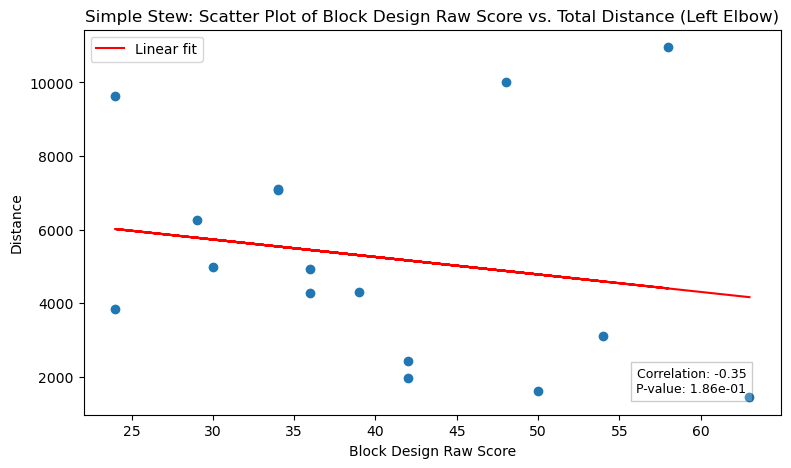

In [25]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['LeftElbow'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['LeftElbow'])


slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['LeftElbow'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Total Distance (Left Elbow)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '4 SS_DistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

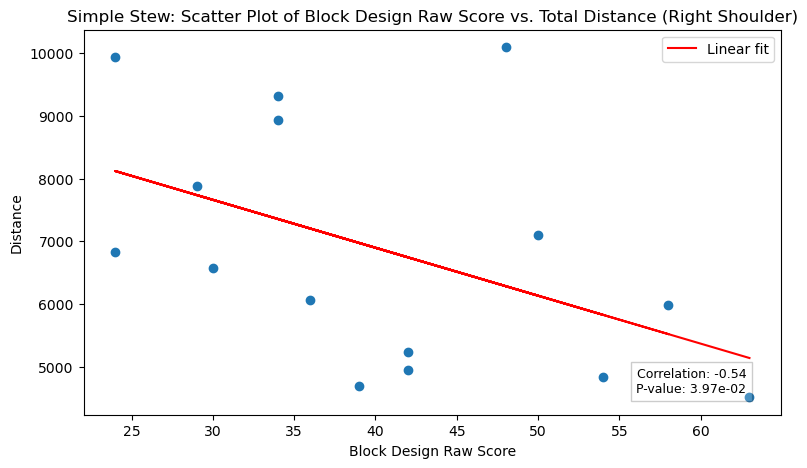

In [26]:
rightshdr_df = final_df[final_df['RightShoulder'] != 0]
correlation, p_value = spearmanr(rightshdr_df['Block Design Raw Score'], rightshdr_df['RightShoulder'])
plt.figure(figsize=(9,5))
plt.scatter(rightshdr_df['Block Design Raw Score'], rightshdr_df['RightShoulder'])


slope, intercept = np.polyfit(rightshdr_df['Block Design Raw Score'], rightshdr_df['RightShoulder'], 1)
fit_line = slope * rightshdr_df['Block Design Raw Score'] + intercept
plt.plot(rightshdr_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Total Distance (Right Shoulder)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '5 SS_DistanceRightShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

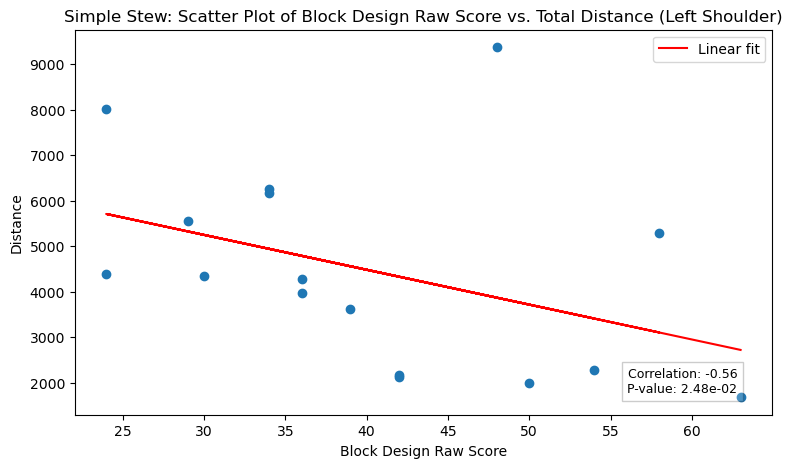

In [27]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['LeftShoulder'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['LeftShoulder'])


slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['LeftShoulder'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Total Distance (Left Shoulder)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '6 SS_DistanceLeftShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

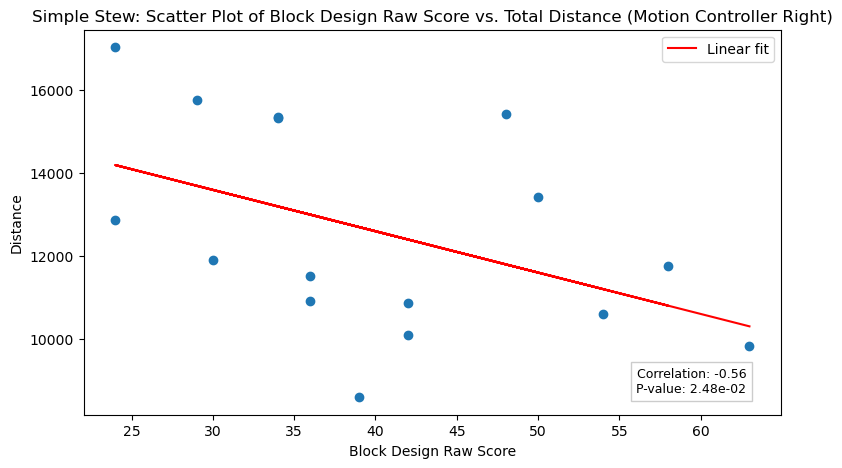

In [28]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['MotionControllerRight'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['MotionControllerRight'])

slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['MotionControllerRight'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Total Distance (Motion Controller Right)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '7 SS_DistanceMotionContRight.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

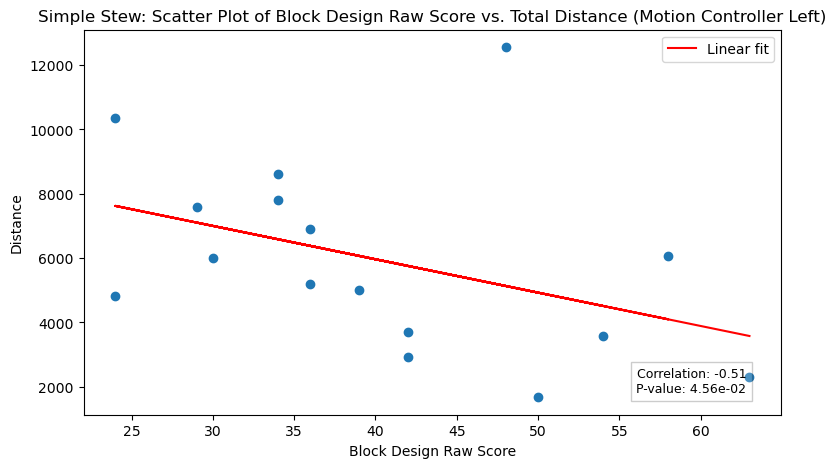

In [29]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['MotionControllerLeft'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['MotionControllerLeft'])

slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['MotionControllerLeft'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Total Distance (Motion Controller Left)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '8 SS_DistanceMotionContLeft.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

In [30]:
def extract_dataframe(file_path):
    with open(file_path, 'r') as file:
        nb = nbformat.read(file, as_version=4)
        
    local_context = {}
    for cell in nb.cells:
        if cell.cell_type == 'code':
            try:
                exec(cell.source, {}, local_context)
                if 'combined_pivot_df' in local_context:
                    return local_context['combined_pivot_df']
            except Exception as e:
                print(f"Error executing cell in {file_path}: {e}")
    return None

# List to store dataframes from each notebook
dataframes = []

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_SimpleStew/'
file_pattern = directory + '*_Movement.ipynb'

# Extract data from each notebook
for file_path in glob.glob(file_pattern):
    participant_id = os.path.basename(file_path)[:4]  # Extract the first 4 characters of the filename
    df = extract_dataframe(file_path)
    if df is not None:
        df['Participant'] = participant_id  # Add a new column for Participant ID
        dataframes.append(df)

# Combine all dataframes into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df

Tracker            Step  Chest Euclidean Distance  \
0              Add Beef                667.417289   
1            Add Carrot                288.999699   
2             Add Onion                591.977768   
3            Add Potato                236.407347   
4              Add Salt                 83.299603   
..                  ...                       ...   
145         Add Tomtato                  0.000000   
146          Add pepper                  0.000000   
147      Post last step                  0.000000   
148          Pour Broth                  0.000000   
149           Stir Stew                  0.000000   

Tracker  HeadCamera Euclidean Distance  LeftElbow Euclidean Distance  \
0                           892.612437                    546.694850   
1                           379.583666                    865.589347   
2                           744.175227                    479.253096   
3                           275.617842                    440.368490   
4                            98.276221                     73.688115   
..                                 ...                           ...   
145                         199.831604                    119.678513   
146                         107.145970                     51.650948   
147                         235.216890                    164.069336   
148                         450.722714                    293.158968   
149                         101.159535                     54.865752   

Tracker  LeftShoulder Euclidean Distance  \
0                             632.755838   
1                             584.494307   
2                             548.160436   
3                             293.096624   
4                              69.105062   
..                                   ...   
145                           149.460101   
146                            56.231087   
147                           187.459636   
148                           292.737596   
149                            65.837750   

Tracker  MotionControllerLeft Euclidean Distance  \
0                                     654.999073   
1                                    1058.248780   
2                                     567.250282   
3                                     584.602126   
4                                      99.519804   
..                                           ...   
145                                   159.043483   
146                                    78.047747   
147                                   237.052581   
148                                   585.663367   
149                                    86.182438   

Tracker  MotionControllerRight Euclidean Distance  \
0                                     2123.031272   
1                                     1419.609542   
2                                     1678.958115   
3                                      805.591214   
4                                      327.744353   
..                                            ...   
145                                    939.050195   
146                                    353.010903   
147                                    836.556736   
148                                    946.570463   
149                                    424.372150   

Tracker  RightElbow Euclidean Distance  RightShoulder Euclidean Distance  \
0                             0.000000                          0.000000   
1                             0.000000                          0.000000   
2                             0.000000                          0.000000   
3                             0.000000                          0.000000   
4                             0.000000                          0.000000   
..                                 ...                               ...   
145                         717.844116                        461.530071   
146                         292.959246                        193.138528   
147                    

In [31]:
final_df = pd.merge(bscore, combined_df, on='Participant', how='inner')
final_df

Participant  Block Design Raw Score            Step  \
0          C001                      36        Add Beef   
1          C001                      36      Add Carrot   
2          C001                      36       Add Onion   
3          C001                      36      Add Potato   
4          C001                      36        Add Salt   
..          ...                     ...             ...   
145        C032                      63     Add Tomtato   
146        C032                      63      Add pepper   
147        C032                      63  Post last step   
148        C032                      63      Pour Broth   
149        C032                      63       Stir Stew   

     Chest Euclidean Distance  HeadCamera Euclidean Distance  \
0                  667.417289                     892.612437   
1                  288.999699                     379.583666   
2                  591.977768                     744.175227   
3                  236.407347                     275.617842   
4                   83.299603                      98.276221   
..                        ...                            ...   
145                  0.000000                     199.831604   
146                  0.000000                     107.145970   
147                  0.000000                     235.216890   
148                  0.000000                     450.722714   
149                  0.000000                     101.159535   

     LeftElbow Euclidean Distance  LeftShoulder Euclidean Distance  \
0                      546.694850                       632.755838   
1                      865.589347                       584.494307   
2                      479.253096                       548.160436   
3                      440.368490                       293.096624   
4                       73.688115                        69.105062   
..                            ...                              ...   
145                    119.678513                       149.460101   
146                     51.650948                        56.231087   
147                    164.069336                       187.459636   
148                    293.158968                       292.737596   
149                     54.865752                        65.837750   

     MotionControllerLeft Euclidean Distance  \
0                                 654.999073   
1                                1058.248780   
2                                 567.250282   
3                                 584.602126   
4                                  99.519804   
..                                       ...   
145                               159.043483   
146                                78.047747   
147                               237.052581   
148                               585.663367   
149                                86.182438   

     MotionControllerRight Euclidean Distance  RightElbow Euclidean Distance  \
0                                 2123.031272                       0.000000   
1                                 1419.609542                       0.000000   
2                                 1678.958115                       0.000000   
3                                  805.591214                       0.000000   
4                                  327.744353                       0.000000   
..                                        ...                            ...   
145                                939.050195                     717.844116   
146                                353.010903                     292.959246   
147                                836.556736                     645.213662   
148                                946.570463                     541.020197   
149                                424.372150                     296.949234   

     RightShoulder Euclidean Distance  
0                            0.000000  
1                            0.000000  
2                          

In [32]:
column_rename = {
    'Chest Euclidean Distance': 'Chest Distance',
    'HeadCamera Euclidean Distance': 'HeadCamera Distance',
    'LeftElbow Euclidean Distance': 'LeftElbow Distance',
    'LeftShoulder Euclidean Distance': 'LeftShoulder Distance',
    'MotionControllerLeft Euclidean Distance': 'MotionControllerLeft Distance',
    'MotionControllerRight Euclidean Distance': 'MotionControllerRight Distance',
    'RightElbow Euclidean Distance': 'RightElbow Distance',
    'RightShoulder Euclidean Distance': 'RightShoulder Distance'
}

final_df = final_df.rename(columns=column_rename)
final_df

Participant  Block Design Raw Score            Step  Chest Distance  \
0          C001                      36        Add Beef      667.417289   
1          C001                      36      Add Carrot      288.999699   
2          C001                      36       Add Onion      591.977768   
3          C001                      36      Add Potato      236.407347   
4          C001                      36        Add Salt       83.299603   
..          ...                     ...             ...             ...   
145        C032                      63     Add Tomtato        0.000000   
146        C032                      63      Add pepper        0.000000   
147        C032                      63  Post last step        0.000000   
148        C032                      63      Pour Broth        0.000000   
149        C032                      63       Stir Stew        0.000000   

     HeadCamera Distance  LeftElbow Distance  LeftShoulder Distance  \
0             892.612437          546.694850             632.755838   
1             379.583666          865.589347             584.494307   
2             744.175227          479.253096             548.160436   
3             275.617842          440.368490             293.096624   
4              98.276221           73.688115              69.105062   
..                   ...                 ...                    ...   
145           199.831604          119.678513             149.460101   
146           107.145970           51.650948              56.231087   
147           235.216890          164.069336             187.459636   
148           450.722714          293.158968             292.737596   
149           101.159535           54.865752              65.837750   

     MotionControllerLeft Distance  MotionControllerRight Distance  \
0                       654.999073                     2123.031272   
1                      1058.248780                     1419.609542   
2                       567.250282                     1678.958115   
3                       584.602126                      805.591214   
4                        99.519804                      327.744353   
..                             ...                             ...   
145                     159.043483                      939.050195   
146                      78.047747                      353.010903   
147                     237.052581                      836.556736   
148                     585.663367                      946.570463   
149                      86.182438                      424.372150   

     RightElbow Distance  RightShoulder Distance  
0               0.000000                0.000000  
1               0.000000                0.000000  
2               0.000000                0.000000  
3               0.000000                0.000000  
4               0.000000                0.000000  
..                   ...                     ...  
145           717.844116              461.530071  
146           292.959246              193.138528  
147           645.213662              429.083147  
148           541.020197              408.196800  
149           296.949234              191.777159  

[150 rows x 11 columns]

In [33]:
#final_df.to_csv('SimpleStew_MS_PerStep.csv',index=False)